# Projekt 2 na M'AI

*Autorzy: Piotr Ginalski, Jakub Sęk, Łukasz Wodnicki*

Naszym zadaniem jest napisanie funkcji znajdującej minimum funkcji. Jednocześnie poszukujemy metod, które nie zakładają różniczkowalności naszej funkcji oraz mogące mieć wiele minimum lokalnych. W szczególności jako test bierzemy funkcję
$$
L^k(x) = x^2(\sin kx + 2).
$$
Najpierw dokonamy wizualizacji naszej funkcji.

In [1]:
import matplotlib.pyplot as plt #użyjemy tylko na potrzeby wizualizacji, podobnie pyplota
import random
import math


# Definicja funkcji celu
def L(k, x):
    return x * x * (math.sin(k * x) + 2)

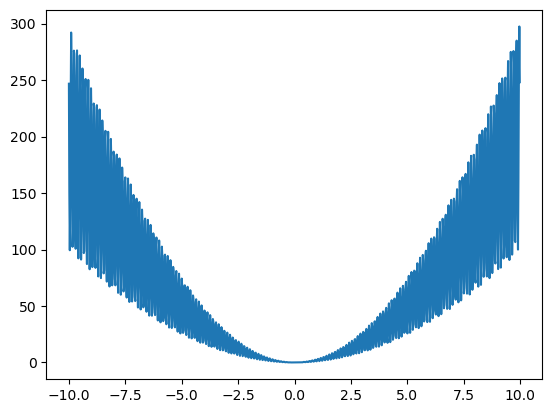

In [2]:
number_of_points = 1000
k = 50

x_list = [-10 + 20*k/number_of_points for k in range(0, number_of_points)]
y_list = [L(k, x) for x in x_list]

plt.plot(x_list, y_list)
plt.show()

Jak widzimy nasza funkcja ma wiele minimów lokalnych. Przejdźmy do opisu metody, której użyjemy do znalezienia minimum tej funkcji.

# Simulated Annealing

*TU BEDZIE OPIS METODY*

Przejdźmy do samego kodu. Zamierzamy szukać minimum, póki nie znajdziemy czegoś bliżej niż $10^{-6}$. Następnie zwrócimy liczbę kroków potrzebną do znalezienia tego minimum (jeśli zostało ono osiągnięte) oraz -1 jeśli nie udało nam się zbliżyć wystarczająco blisko.

In [3]:
def sa_steps(k, init_temp=2.0, n = 50000, alpha=0.85, steps_per_temp=200, threshold=1e-6):
    x = random.uniform(-10, 10)
    best_val = L(k, x)
    T = init_temp
    steps = 0
    while n > steps:
        for _ in range(steps_per_temp):
            dx = random.uniform(-1, 1) * T
            x_new = min(max(x + dx, -10), 10)
            v_new = L(k, x_new)
            steps += 1  # każdy krok = jedna ewaluacja nowego x
            if v_new < best_val:
                best_val = v_new
            if v_new < threshold:  # warunek stopu
                return x, steps
            v_curr = L(k, x)
            if v_new < v_curr or random.random() < math.exp((v_curr - v_new) / T):
                x = x_new
        T *= alpha
    
    return x, steps

I ostatecznie, możemy zbadać zależność N vs K.

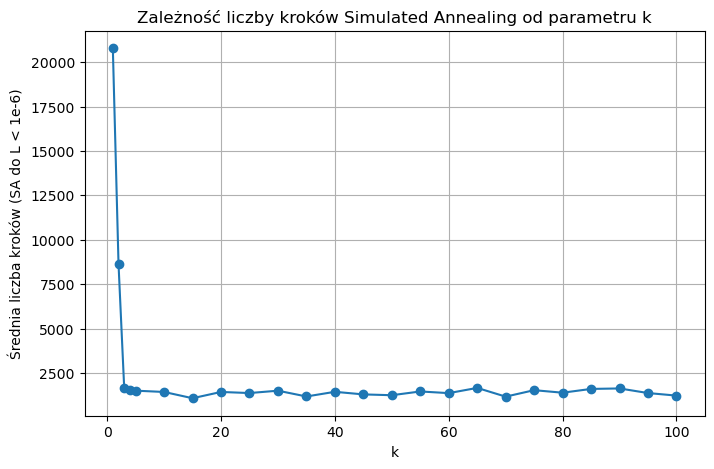

In [6]:
random.seed(42)
k_vals = [1, 2, 3, 4] + [5*k for k in range(1, 21)]
trials = 20

# Obliczanie średniej liczby kroków dla każdego k
avg_steps = []
for k in k_vals:
    mean = 0
    steps_list = [sa_steps(k)[1] for _ in range(trials)]
    for value in steps_list:
        mean += value
    mean = mean / trials
    avg_steps.append(mean)

# Rysowanie wykresu
plt.figure(figsize=(8, 5))
plt.plot(k_vals, avg_steps, marker='o', linestyle='-')
plt.xlabel('k')
plt.ylabel('Średnia liczba kroków (SA do L < 1e-6)')
plt.title('Zależność liczby kroków Simulated Annealing od parametru k')
plt.grid(True)
plt.show()

# Podsumowanie

*TU BEDZIE PODSUMOWANIE*